In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import datetime
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
#bringing in the data set
df = pd.read_csv('movies.csv', encoding = 'ISO-8859-1')

In [3]:
#This returns the encoding for the data. the encoding is required for reading the data 
#if it throws an  error: 'utf-8' codec can't decode byte 0xf1 in position 5: invalid continuation byte
import chardet
with open('movies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [4]:
# insoecting the data set

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
#Checking for missing values
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [7]:
#Convert the data types of the budget and gross columns from float to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

Inspecting the data set, we would see that the year of release doesnt match the year in the release date column which should not be. It would make more sense to extract the release year from the release date.

In [8]:
# extracting the year from the release date and creating a new column for it
df['correct_year'] = df['released'].astype('str').str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [9]:
#Sorting the data by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [10]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

Warner Bros. company is the highest grossing movie company.

In [11]:
#Checking the correlation between the various variables

In [12]:
# Doing a general Correlation Matrix across all numeric columns
df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


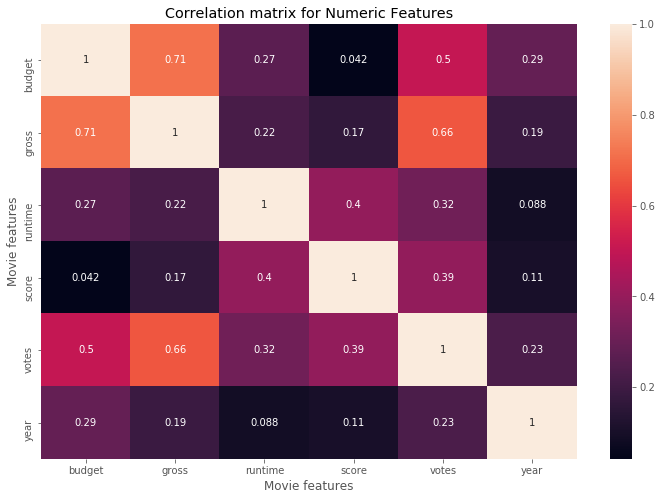

In [13]:
#Visualizing the correlation
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

The movie budget appears to be the most correlated to gross revenue, while the year of movie release has the least correlation.

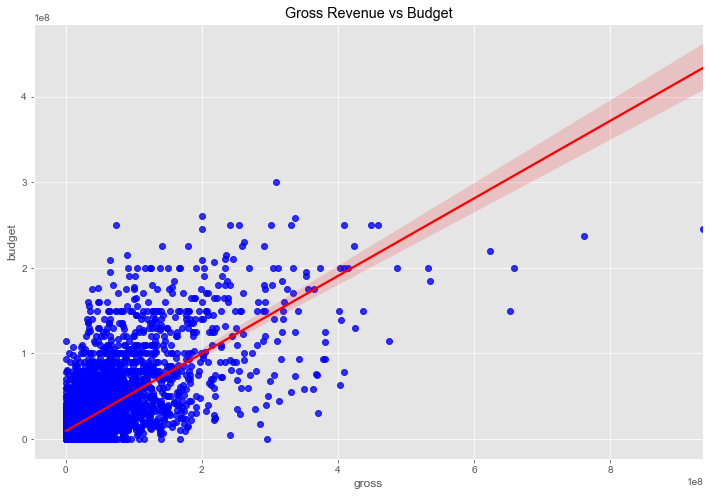

In [14]:
#Visualizing the budget vs the gross revenue.
sns.regplot(x="gross", y="budget", data=df, scatter_kws ={"color":"blue"}, line_kws ={"color":"red"}).set_title('Gross Revenue vs Budget')
sns.set(rc={'figure.figsize':(10,10)}) 

The Scatter plot above shows there is a positive linear correlation between the budget and gross revenue for movies.

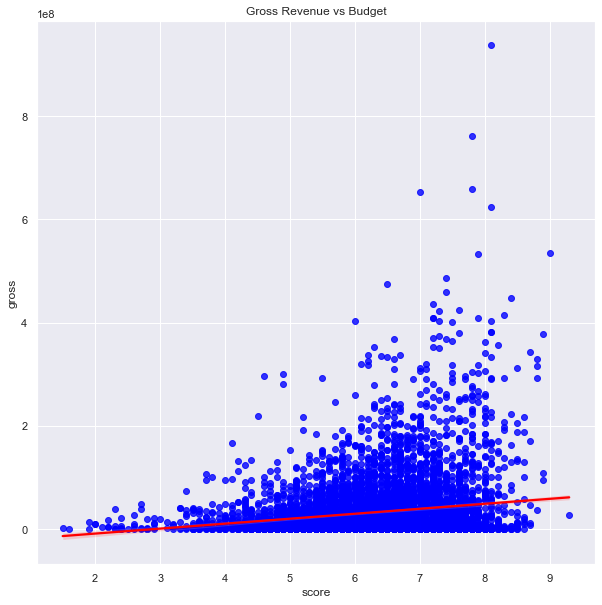

In [15]:
# Checking Correlation between Score rating vs Gross revenue

sns.regplot(x="score", y="gross", data=df, scatter_kws ={"color":"blue"}, line_kws ={"color":"red"}).set_title('Gross Revenue vs Budget')
sns.set(rc={'figure.figsize':(10,10)})


Although there exists a positive correlation between the rating score and the gross revenue, the correlation is quite minimal. it appears as though many movies have high ratings but still have low gross earnings.

In [16]:
#Building a correlation matrix to include string and categorical variables
# Using factorize - this assigns a random numeric value to each unique categorical value
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,2016,30


In [17]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204,-0.062707
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088,0.001822
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.996187,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


In [18]:
#Factorizing and creating a correlation matrix
df.apply(lambda x: x.factorize()[0]).corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
budget,1.000000,-0.053390,-0.058972,0.098884,0.009617,0.265780,0.260056,0.033532,0.267866,0.182441,-0.019359,0.082724,0.276622,0.168884,0.274476,0.227619
company,-0.053390,1.000000,0.207891,0.528937,0.083304,0.595539,0.585783,0.035007,0.590363,-0.017205,-0.028393,0.499675,0.556854,0.525347,0.589459,0.459923
country,-0.058972,0.207891,1.000000,0.139928,0.026460,0.110702,0.109299,0.170565,0.114623,0.088068,-0.010712,0.153764,0.101652,0.138723,0.107460,0.092074
director,0.098884,0.528937,0.139928,1.000000,0.050684,0.718102,0.708987,0.059209,0.714279,-0.048564,-0.015889,0.621374,0.692806,0.711480,0.716466,0.566743
genre,0.009617,0.083304,0.026460,0.050684,1.000000,0.061585,0.064614,0.045332,0.063290,0.068504,-0.044007,0.064794,0.057885,0.054884,0.063244,0.054964
gross,0.265780,0.595539,0.110702,0.718102,0.061585,1.000000,0.980170,0.015757,0.988701,0.067788,-0.036941,0.696549,0.963910,0.795554,0.997612,0.795888
name,0.260056,0.585783,0.109299,0.708987,0.064614,0.980170,1.000000,0.016060,0.971935,0.065114,-0.035479,0.686017,0.946291,0.786625,0.980672,0.781578
rating,0.033532,0.035007,0.170565,0.059209,0.045332,0.015757,0.016060,1.000000,0.018538,0.019492,0.012675,0.083682,0.007277,0.037288,0.012236,0.021475
released,0.267866,0.590363,0.114623,0.714279,0.063290,0.988701,0.971935,0.018538,1.000000,0.073431,-0.039006,0.692609,0.955360,0.790091,0.989946,0.798753
runtime,0.182441,-0.017205,0.088068,-0.048564,0.068504,0.067788,0.065114,0.019492,0.073431,1.000000,-0.010943,-0.005030,0.080750,0.016035,0.075231,0.065295


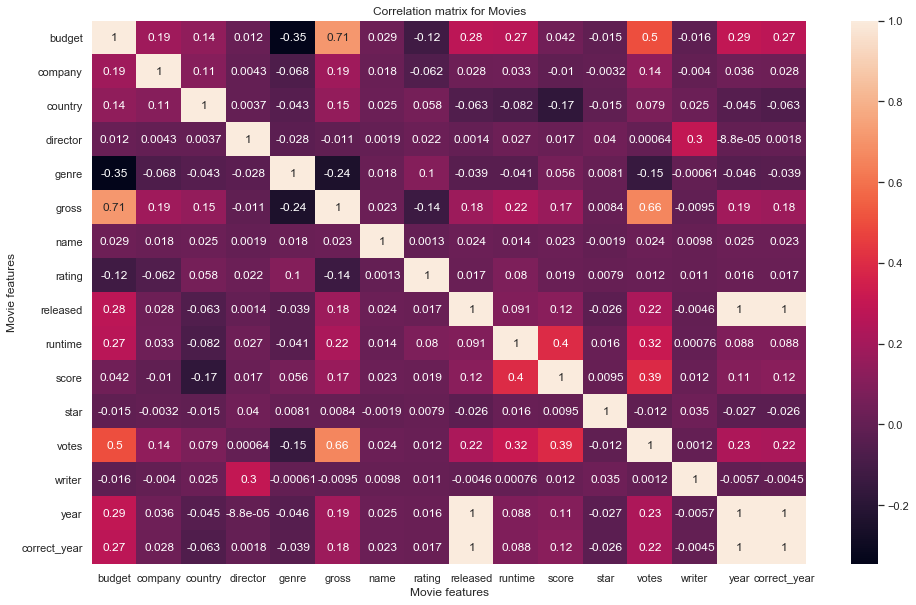

In [19]:
#Visualizing the correlation matrix
correlation_matrix = df_numerized.corr()

plt.figure(figsize=(16,10))

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()



In [20]:
#Unstacking the correlation matrix to see the correlation between variable pairs
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
                                ...   
correct_year  star           -0.026050
              votes           0.220797
              writer         -0.004546
              year            0.996229
              correct_year    1.000000
Length: 256, dtype: float64

In [21]:
#Sorting the correlation pairs 
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [22]:
#Picking out pairs with high correlation (>0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

strong_pairs

votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
correct_year  year            0.996229
year          correct_year    0.996229
correct_year  released        0.999389
released      correct_year    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

The above correlation pairs show that votes and budget have the highest correlation on gross earning.